In [1]:
## IMPORTS 
import evotoon
from data_classes import CatParam, IntParam, FloatParam

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns#

import random

import warnings
warnings.filterwarnings("ignore")

## MAKE SEED
SEED = evotoon.make_seed(925)

In [3]:
folder_list = [
		'./InstanciasNKLandscapes/Instances-Testing/nk_2_20',
		'./InstanciasNKLandscapes/Instances-Testing/nk_2_38',
		'./InstanciasNKLandscapes/Instances-Testing/nk_2_52',
		'./InstanciasNKLandscapes/Instances-Testing/nk_3_20',
		'./InstanciasNKLandscapes/Instances-Testing/nk_3_34',
		'./InstanciasNKLandscapes/Instances-Testing/nk_3_48',
		'./InstanciasNKLandscapes/Instances-Testing/nk_4_20',
		'./InstanciasNKLandscapes/Instances-Testing/nk_4_30',
		'./InstanciasNKLandscapes/Instances-Testing/nk_4_40',
		'./InstanciasNKLandscapes/Instances-Testing/nk_5_20',
		'./InstanciasNKLandscapes/Instances-Testing/nk_5_28',
		'./InstanciasNKLandscapes/Instances-Testing/nk_5_38',
		'./InstanciasNKLandscapes/Instances-Testing/nk_6_20',
		'./InstanciasNKLandscapes/Instances-Testing/nk_6_26',
		'./InstanciasNKLandscapes/Instances-Testing/nk_6_32'
 ]

In [2]:
separator = "--------------------------------------------------------"
## EXAMPLE WITH CodGA

# Env configuration
poblation_size = 15

# Parameter settings
float_params = [
	FloatParam("p_c", 0.001, 1, 3),
	FloatParam("p_m", 0.001, 1, 3),
]
cat_params = [
	CatParam("c_0", [1,2])
]
int_params = [
	IntParam("N", 1, 50),
]

all_params = float_params + int_params + cat_params
all_params = {param.name: param for param in all_params}



initial_batch = evotoon.initialization(poblation_size, float_params, int_params, cat_params)

# Tuner parameters

update_cycle = 3
budget = 1000

# SET ENVIRONMENT FOR THE ACO ALGORITHM TO TUNE
n = 100

instance_list = [
	"./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1",
	"./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.2",
	"./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.3",
	"./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.4",
	"./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.5",
	"./InstanciasNKLandscapes/Instances-Training/nk_2_52/nk_52_2.1",
	"./InstanciasNKLandscapes/Instances-Training/nk_2_52/nk_52_2.2",
	"./InstanciasNKLandscapes/Instances-Training/nk_2_52/nk_52_2.3",
	"./InstanciasNKLandscapes/Instances-Training/nk_2_52/nk_52_2.4",
	"./InstanciasNKLandscapes/Instances-Training/nk_2_52/nk_52_2.5",
	"./InstanciasNKLandscapes/Instances-Training/nk_6_20/nk_20_6.1",
	"./InstanciasNKLandscapes/Instances-Training/nk_6_20/nk_20_6.2",
	"./InstanciasNKLandscapes/Instances-Training/nk_6_20/nk_20_6.3",
	"./InstanciasNKLandscapes/Instances-Training/nk_6_20/nk_20_6.4",
	"./InstanciasNKLandscapes/Instances-Training/nk_6_20/nk_20_6.5",
	"./InstanciasNKLandscapes/Instances-Training/nk_6_20/nk_20_6.5",
]

instance_list, seed_list = evotoon.select_seeds(instance_list, n, SEED)

print(separator, "Instances running and seeds", separator)
for ins,seed in zip(instance_list,seed_list):
	print("instance:", ins, "seed:", seed)

function_kwargs = {
	"executable_path": "./CodGA/ga-nk",
	"instance_list": instance_list,
	"seed_list": seed_list,
	"output": "xd.txt",
	"t_max": 1000 
}



-------------------------------------------------------- Instances running and seeds --------------------------------------------------------
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 925
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 926
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 927
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 928
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 929
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 930
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 931
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 932
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 933
instance: ./InstanciasNKLandscapes/Instances-Training/nk_4_30/nk_30_4.1 seed: 934
instance: ./InstanciasNKLandscapes/Ins

In [ ]:
df_model_list = []
a = 0
for i in range(1,9):
	for j in range(1,9):
		model_kwargs = {
			"layers": i,
			"neurons": i * [j]
		}
		df = evotoon.evo_tunning(all_params=all_params, float_params=float_params, int_params=int_params, budget=budget, poblation_size=poblation_size, initial_batch=initial_batch, execute_algorithm=evotoon.execute_CodGA, model_kwargs=model_kwargs, returning_type="ABSOLUTE_OPTIMAL_DIFF", **function_kwargs)
		df.to_csv(f'./codga_model_exp/layers_{i}-neurons_{j}.txt', sep='\t', index=False)
		a = a+1
		print(f"{a}/{8*8}", end='\r')
		

In [2]:
def get_best_confs(folder):
	cols = ["p_c", "p_m", "N", "c_0", "Step_Found", "VALUE"]

	df = pd.DataFrame()
	for file in sorted(os.listdir(folder)):
		path = folder + file
		df = df.append(pd.read_csv(path, usecols= cols, sep='\t').iloc[0])

	return df.reset_index(drop=True)

def run_ga(save_folder, ins_folder, seed, p_c, p_m, N, c_0, t_max):
	instance_list = []
	for file in sorted(os.listdir(ins_folder)):
		file_path = os.path.join(ins_folder, file)
		instance_list.append(file_path)

	output = "lol.txt"
	if not os.path.exists(save_folder):
		os.makedirs(save_folder)
	f = open(save_folder+"/"+ins_folder.split("/")[-1]+"-"+str(seed)+".txt", "a")
	for file in instance_list:
		out = evotoon.execute_CodGA(file, seed, "./CodGA/ga-nk", p_c, p_m, N, t_max, c_0, output) * -1
		f.write(str(out)+"\n")
	f.close()

def get_evaluations(folder):
	all_lines = []
	indexes = []
	for file in os.listdir(folder):
		file_path = os.path.join(folder, file)
		f = open(file_path, "r")
		lines = f.readlines()
		all_lines = all_lines + [float(line.rstrip("\n")) for line in lines]
		indexes = indexes + [f"{file}_{i}" for i, line in enumerate(lines)]
	return pd.Series(all_lines, index=indexes)

def get_results_df(folder):
	cols = ["SEED " + str(i) for i in range(SEED, SEED+5)]
	dict_y = {}

	df = pd.DataFrame()
	for i in range(1,6):
		path = f"./codgatesting/{folder}/{i}"
		for file in sorted(os.listdir(path)):
			file_path = os.path.join(path, file)
			f = open(file_path, "r")
			lines = f.readlines()
			lines = [float(line.rstrip("\n")) for line in lines]
			mean = sum(lines)/len(lines)
			row_name, seed = file.split("-")[0], file.split("-")[1].split(".")[0]
			if not dict_y.get(row_name):
				dict_y[row_name] = {}
			dict_y[row_name][seed] = mean
			f.close()

		df_y = pd.DataFrame.from_dict(dict_y, orient='index')
		df[i] = df_y.mean(axis=1)

	df.loc["Promedio"] = df.mean()
	df.loc["Mediana"] = df.median()
	df.loc["Desviación"] = df.std()
	df = df.round(1)
	return df

In [3]:
path = "./model_test/codga_executions/"
df = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df = pd.concat([df, get_evaluations(path+folder)], axis=1)

df.columns = [f"conf_{i}_{j}" for i in range(1, 9) for j in range(1, 9)]
df = df.dropna()
df_sample = df.sample(int(df.shape[0] * 0.1), random_state=SEED)

In [4]:
df = df_sample.rank(axis=1, numeric_only=True)
df = df * -1
df

,conf_1_1,conf_1_2,conf_1_3,conf_1_4,conf_1_5,conf_1_6,conf_1_7,conf_1_8,conf_2_1,conf_2_2,...,conf_7_7,conf_7_8,conf_8_1,conf_8_2,conf_8_3,conf_8_4,conf_8_5,conf_8_6,conf_8_7,conf_8_8
nk_6_20-925.txt_410,-59.0,-42.0,-46.5,-54.0,-45.0,-9.0,-44.0,-36.0,-31.0,-14.0,...,-32.0,-53.0,-12.0,-33.0,-61.5,-56.0,-24.0,-28.5,-46.5,-17.0
nk_2_38-927.txt_527,-51.0,-37.0,-18.5,-26.5,-32.0,-56.0,-29.5,-17.0,-34.5,-50.0,...,-23.0,-43.0,-41.0,-3.0,-60.5,-31.0,-13.0,-11.5,-40.0,-26.5
nk_3_48-927.txt_168,-6.0,-24.0,-39.0,-30.0,-47.0,-27.0,-12.0,-26.0,-7.0,-37.0,...,-16.0,-15.0,-40.0,-41.0,-30.0,-45.0,-36.0,-10.0,-54.0,-5.0
nk_5_20-927.txt_621,-14.0,-36.5,-31.0,-38.5,-50.0,-48.0,-59.0,-41.0,-24.0,-29.5,...,-1.0,-11.5,-17.0,-43.5,-55.5,-60.5,-20.5,-11.5,-26.5,-33.5
nk_2_52-926.txt_938,-25.5,-24.0,-32.0,-19.5,-55.0,-54.0,-15.0,-51.0,-30.0,-19.5,...,-6.0,-45.0,-29.0,-47.0,-61.5,-53.0,-23.0,-12.5,-16.5,-9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nk_4_40-925.txt_374,-43.0,-13.0,-14.0,-35.0,-55.0,-57.0,-22.0,-25.0,-51.0,-5.0,...,-23.0,-60.0,-52.0,-2.0,-40.5,-9.0,-4.0,-45.5,-27.0,-20.0
nk_3_48-925.txt_406,-49.0,-30.0,-33.0,-20.0,-25.0,-54.0,-36.0,-47.0,-29.0,-62.0,...,-31.0,-60.0,-44.0,-53.0,-56.5,-26.0,-22.0,-3.5,-41.0,-45.0
nk_2_52-925.txt_768,-25.0,-52.0,-8.5,-13.0,-4.0,-22.0,-63.0,-14.0,-16.0,-7.0,...,-20.0,-36.0,-41.0,-26.0,-28.5,-58.0,-8.5,-30.5,-48.0,-35.0
nk_6_26-926.txt_503,-16.0,-31.0,-64.0,-46.5,-13.0,-8.0,-29.0,-17.0,-6.5,-60.0,...,-33.5,-59.0,-55.0,-51.0,-49.5,-48.0,-14.5,-23.5,-18.0,-57.0


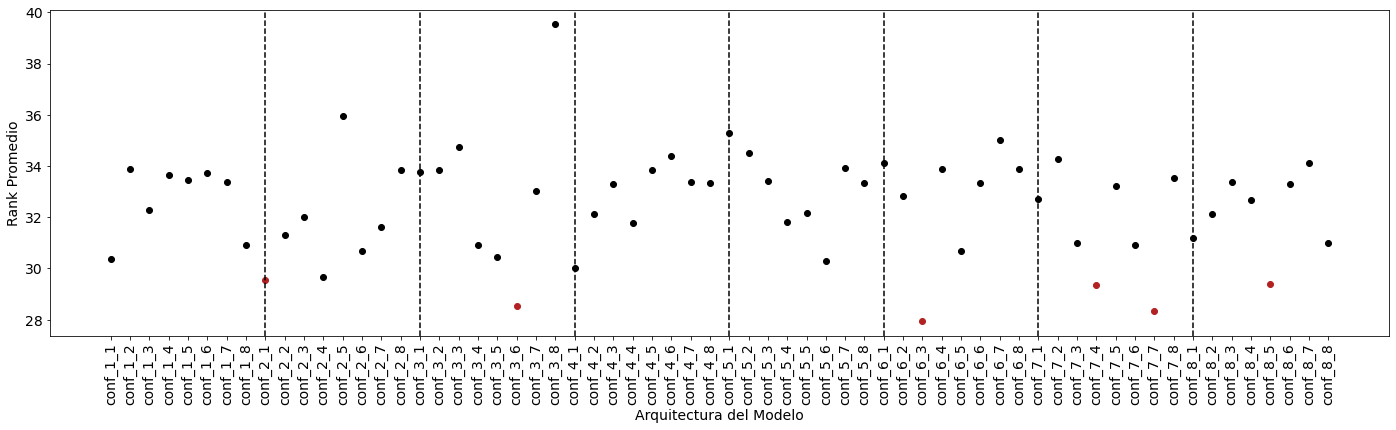

In [5]:
x = df.columns
y = [-1*sum(df[a])/len(df[a]) for a in df]
colors = ["firebrick" if i in ["conf_2_1", "conf_6_3", "conf_7_4", "conf_8_5", "conf_3_6", "conf_7_7"] else "black" for i in x]
plt.rcParams.update({'font.size': 14})
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank Promedio")
for a,b,c in zip(x,y,colors):
	plt.scatter(a, b, color=c)
for i in range(1,8):
	plt.axvline(8*i, color = 'black', linestyle = '--')


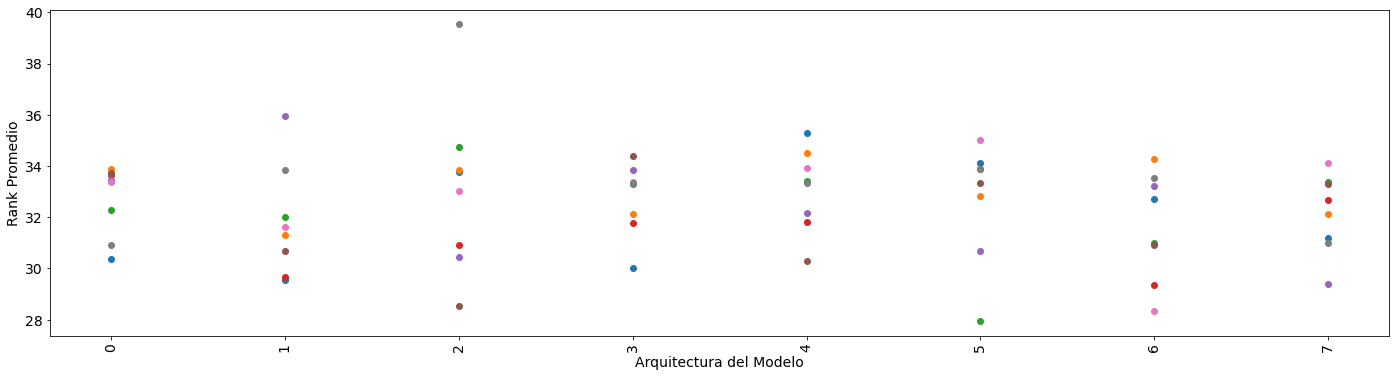

In [6]:

for i in range(1,9):
	x = [conf for j, conf in enumerate(df.columns) if int(conf.replace("n","").split("_")[2])==i]
	y = [-1*sum(df[a])/len(df[a]) for a in x]
	# colors = ["firebrick" if i in df_final.columns else "black" for i in x]
	plt.rcParams["figure.figsize"] = (24,6)
	plt.xticks(rotation=90)
	plt.xlabel("Arquitectura del Modelo")
	plt.ylabel("Rank Promedio")
	#plt.subplot(16, 1, i)
	plt.scatter(list(range(8)),y)
	# for i in range(1,8):
	# 	plt.axvline(16*i, color = 'black', linestyle = '--')
	# for a,b,c in zip(x,y,colors):
	# 	plt.scatter(a, b, color=c)
plt.show()



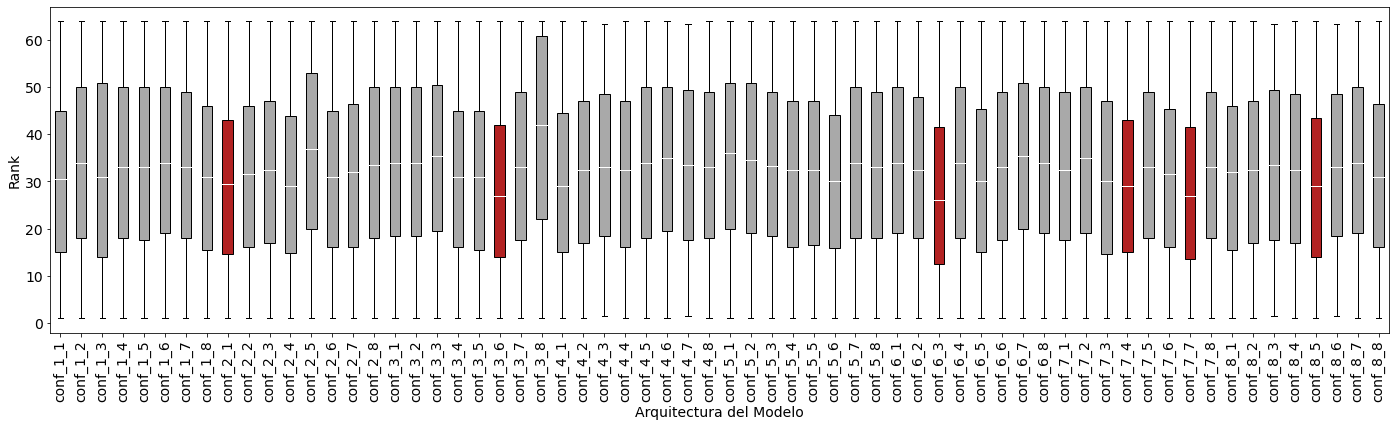

In [7]:
x = df.columns
y = [-1*df[a] for a in df]
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank")


a = plt.boxplot(y, labels=x, patch_artist=True)

for label, box in zip(x,a["boxes"]):
	if label in ["conf_2_1", "conf_6_3", "conf_7_4", "conf_8_5", "conf_3_6", "conf_7_7"]:
		box.set_facecolor("firebrick")
	else:
		box.set_facecolor("darkgray")

for median in a['medians']:
    median.set_color('white')

In [8]:
# compare samples
args = tuple(df[conf] for conf in df)

stat, p = friedmanchisquare(*args)

# interpret
alpha = 0.05
if p < alpha:
    # Different distributions (reject H0)
    posthoc_matrix = sp.posthoc_conover(
        pd.melt(df, var_name="configuration", value_name="rank"),
        val_col="rank",
        group_col="configuration",
        p_adjust="holm",
    )
    different_dists = posthoc_matrix.index[
        posthoc_matrix[df.sum().idxmax()] < 0.05
    ].tolist()
    df.drop(different_dists, axis=1, inplace=True)

In [9]:
path = "./testing/codgatesting/evotoon/"
df_evotoon = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df_evotoon = pd.concat([df_evotoon, get_evaluations(path+folder)], axis=1)

df_evotoon.columns = [f"evo_{i}" for i in range(1, 6)]
df_evotoon


,evo_1,evo_2,evo_3,evo_4,evo_5
nk_4_40-765.txt_0,11.0,270.0,54.0,34.0,126.0
nk_4_40-765.txt_1,87.0,504.0,441.0,190.0,1000.0
nk_4_40-765.txt_2,273.0,180.0,178.0,117.0,677.0
nk_4_40-765.txt_3,378.0,185.0,5.0,26.0,614.0
nk_4_40-765.txt_4,377.0,1000.0,179.0,760.0,307.0
...,...,...,...,...,...
nk_4_40-768.txt_995,37.0,810.0,52.0,1000.0,1000.0
nk_4_40-768.txt_996,337.0,181.0,1000.0,564.0,5.0
nk_4_40-768.txt_997,82.0,435.0,258.0,5.0,386.0
nk_4_40-768.txt_998,17.0,510.0,207.0,734.0,902.0


In [10]:
path = "./testing/codgatesting/irace/"
df_irace = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df_irace = pd.concat([df_irace, get_evaluations(path+folder)], axis=1)

df_irace.columns = [f"irace_{i}" for i in range(1, 6)]
df_irace


,irace_1,irace_2,irace_3,irace_4,irace_5
nk_4_40-765.txt_0,17.0,98.0,59.0,98.0,76.0
nk_4_40-765.txt_1,317.0,230.0,1561.0,230.0,916.0
nk_4_40-765.txt_2,1446.0,74.0,582.0,74.0,450.0
nk_4_40-765.txt_3,241.0,189.0,545.0,189.0,8.0
nk_4_40-765.txt_4,1324.0,73.0,109.0,73.0,230.0
...,...,...,...,...,...
nk_4_40-768.txt_995,667.0,68.0,29.0,68.0,114.0
nk_4_40-768.txt_996,437.0,265.0,58.0,265.0,338.0
nk_4_40-768.txt_997,302.0,3.0,107.0,3.0,523.0
nk_4_40-768.txt_998,126.0,352.0,130.0,352.0,518.0


In [11]:
path = "./testing/codgatesting/smac/"
df_smac = pd.DataFrame()
for folder in sorted(os.listdir(path), key=int):
	df_smac = pd.concat([df_smac, get_evaluations(path+folder)], axis=1)

df_smac.columns = [f"smac_{i}" for i in range(1, 6)]
df_smac


,smac_1,smac_2,smac_3,smac_4,smac_5
nk_4_40-765.txt_0,85.0,171.0,51.0,45.0,97.0
nk_4_40-765.txt_1,548.0,1253.0,55.0,126.0,79.0
nk_4_40-765.txt_2,1254.0,396.0,1342.0,1642.0,232.0
nk_4_40-765.txt_3,246.0,433.0,21.0,189.0,41.0
nk_4_40-765.txt_4,224.0,368.0,806.0,1475.0,42.0
...,...,...,...,...,...
nk_4_40-768.txt_995,343.0,29.0,199.0,846.0,120.0
nk_4_40-768.txt_996,604.0,89.0,191.0,709.0,173.0
nk_4_40-768.txt_997,678.0,185.0,125.0,93.0,393.0
nk_4_40-768.txt_998,25.0,559.0,2632.0,7.0,6.0


In [29]:
df = pd.concat([df_evotoon, df_irace, df_smac], axis=1)
bans = [(index.split("-")[0],index.split("_")[-1]) for index in df_sample.index]
for tag, val in df.iterrows():
	a = tag.split("-")[0]
	b = tag.split("_")[-1]
	if (a,b) in bans:
		df.drop(tag, inplace=True)
df

,evo_1,evo_2,evo_3,evo_4,evo_5,irace_1,irace_2,irace_3,irace_4,irace_5,smac_1,smac_2,smac_3,smac_4,smac_5
nk_4_40-765.txt_1,87.0,504.0,441.0,190.0,1000.0,317.0,230.0,1561.0,230.0,916.0,548.0,1253.0,55.0,126.0,79.0
nk_4_40-765.txt_2,273.0,180.0,178.0,117.0,677.0,1446.0,74.0,582.0,74.0,450.0,1254.0,396.0,1342.0,1642.0,232.0
nk_4_40-765.txt_4,377.0,1000.0,179.0,760.0,307.0,1324.0,73.0,109.0,73.0,230.0,224.0,368.0,806.0,1475.0,42.0
nk_4_40-765.txt_7,77.0,324.0,380.0,202.0,280.0,170.0,129.0,314.0,129.0,281.0,346.0,7.0,225.0,83.0,25.0
nk_4_40-765.txt_8,70.0,43.0,48.0,511.0,180.0,46.0,158.0,79.0,158.0,11.0,304.0,96.0,439.0,89.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nk_4_40-768.txt_994,995.0,1000.0,562.0,101.0,1000.0,545.0,1644.0,683.0,1644.0,219.0,922.0,1833.0,574.0,3664.0,2602.0
nk_4_40-768.txt_995,37.0,810.0,52.0,1000.0,1000.0,667.0,68.0,29.0,68.0,114.0,343.0,29.0,199.0,846.0,120.0
nk_4_40-768.txt_996,337.0,181.0,1000.0,564.0,5.0,437.0,265.0,58.0,265.0,338.0,604.0,89.0,191.0,709.0,173.0
nk_4_40-768.txt_998,17.0,510.0,207.0,734.0,902.0,126.0,352.0,130.0,352.0,518.0,25.0,559.0,2632.0,7.0,6.0


In [30]:
df_all = df.rank(axis=1, numeric_only=True)
df_all

,evo_1,evo_2,evo_3,evo_4,evo_5,irace_1,irace_2,irace_3,irace_4,irace_5,smac_1,smac_2,smac_3,smac_4,smac_5
nk_4_40-765.txt_1,3.0,10.0,9.0,5.0,13.0,8.0,6.5,15.0,6.5,12.0,11.0,14.0,1.0,4.0,2.0
nk_4_40-765.txt_2,7.0,5.0,4.0,3.0,11.0,14.0,1.5,10.0,1.5,9.0,12.0,8.0,13.0,15.0,6.0
nk_4_40-765.txt_4,10.0,13.0,5.0,11.0,8.0,14.0,2.5,4.0,2.5,7.0,6.0,9.0,12.0,15.0,1.0
nk_4_40-765.txt_7,3.0,13.0,15.0,8.0,10.0,7.0,5.5,12.0,5.5,11.0,14.0,1.0,9.0,4.0,2.0
nk_4_40-765.txt_8,5.0,2.0,4.0,15.0,12.0,3.0,10.5,6.0,10.5,1.0,13.0,9.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nk_4_40-768.txt_994,8.0,9.5,4.0,1.0,9.5,3.0,11.5,6.0,11.5,2.0,7.0,13.0,5.0,15.0,14.0
nk_4_40-768.txt_995,3.0,12.0,4.0,14.5,14.5,11.0,5.5,1.5,5.5,7.0,10.0,1.5,9.0,13.0,8.0
nk_4_40-768.txt_996,9.0,5.0,15.0,12.0,1.0,11.0,7.5,2.0,7.5,10.0,13.0,3.0,6.0,14.0,4.0
nk_4_40-768.txt_998,3.0,10.0,7.0,13.0,14.0,5.0,8.5,6.0,8.5,11.0,4.0,12.0,15.0,2.0,1.0


In [31]:
for a,b in sorted([(a,b/56185) for a,b in df.rank(axis=1, numeric_only=True).sum().items()], key=lambda x: x[1]):
	print(a,round(b,1))

irace_5 7.2
evo_3 7.4
evo_2 7.6
irace_2 7.7
irace_4 7.7
evo_1 7.8
irace_3 8.0
smac_2 8.0
evo_5 8.1
evo_4 8.2
irace_1 8.3
smac_4 8.3
smac_1 8.3
smac_5 8.5
smac_3 8.9


In [34]:
df_all = df_all * -1
# compare samples
args = tuple(df_all[conf] for conf in df_all)

stat, p = friedmanchisquare(*args)

# interpret
alpha = 0.05
if p < alpha:
    # Different distributions (reject H0)
    posthoc_matrix = sp.posthoc_conover(
        pd.melt(df_all, var_name="configuration", value_name="rank"),
        val_col="rank",
        group_col="configuration",
        p_adjust="holm",
    )
    different_dists = posthoc_matrix.index[
        posthoc_matrix[df_all.sum().idxmax()] < 0.05
    ].tolist()
    df_all.drop(different_dists, axis=1, inplace=True)

df_all

,irace_5
nk_4_40-765.txt_1,-12.0
nk_4_40-765.txt_2,-9.0
nk_4_40-765.txt_4,-7.0
nk_4_40-765.txt_7,-11.0
nk_4_40-765.txt_8,-1.0
...,...
nk_4_40-768.txt_994,-2.0
nk_4_40-768.txt_995,-7.0
nk_4_40-768.txt_996,-10.0
nk_4_40-768.txt_998,-11.0


In [31]:
a = [col for col in df.columns if 'evo' in col]
b = [col for col in df.columns if 'irace' in col]
c = [col for col in df.columns if 'smac' in col]

df = pd.lreshape(df_all, {'evo' : a, 'irace' : b, 'smac': c})
df

,evo,irace,smac
0,3.0,8.0,11.0
1,7.0,14.0,12.0
2,10.0,14.0,6.0
3,3.0,7.0,14.0
4,5.0,3.0,13.0
...,...,...,...
280920,9.5,2.0,14.0
280921,14.5,7.0,8.0
280922,1.0,10.0,4.0
280923,14.0,11.0,1.0


TypeError: scatter() missing 1 required positional argument: 'y'

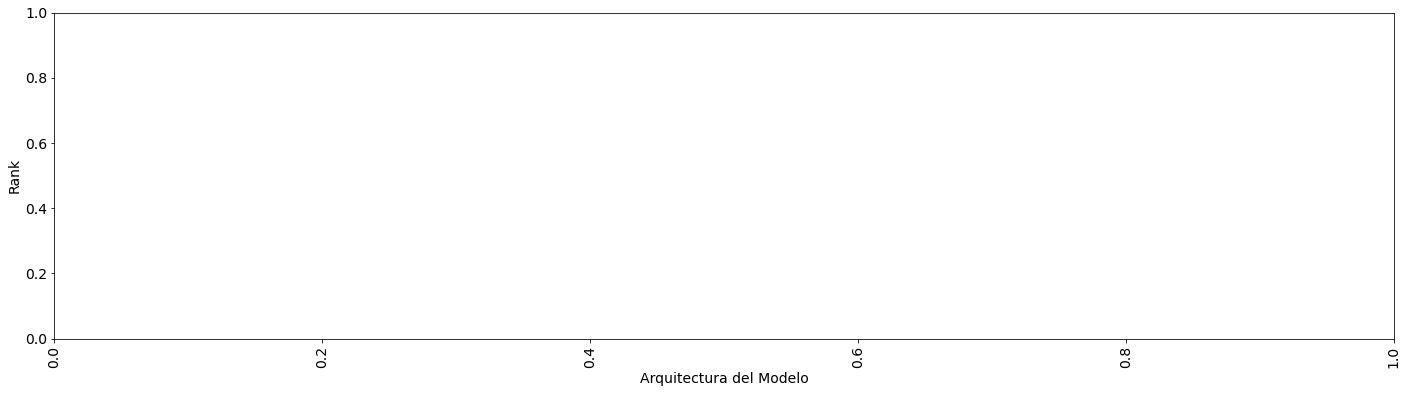

In [32]:
x = df.columns
y = [df[a] for a in df]
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank")


a = plt.scatter(y, labels=x, patch_artist=True, showfliers=False)

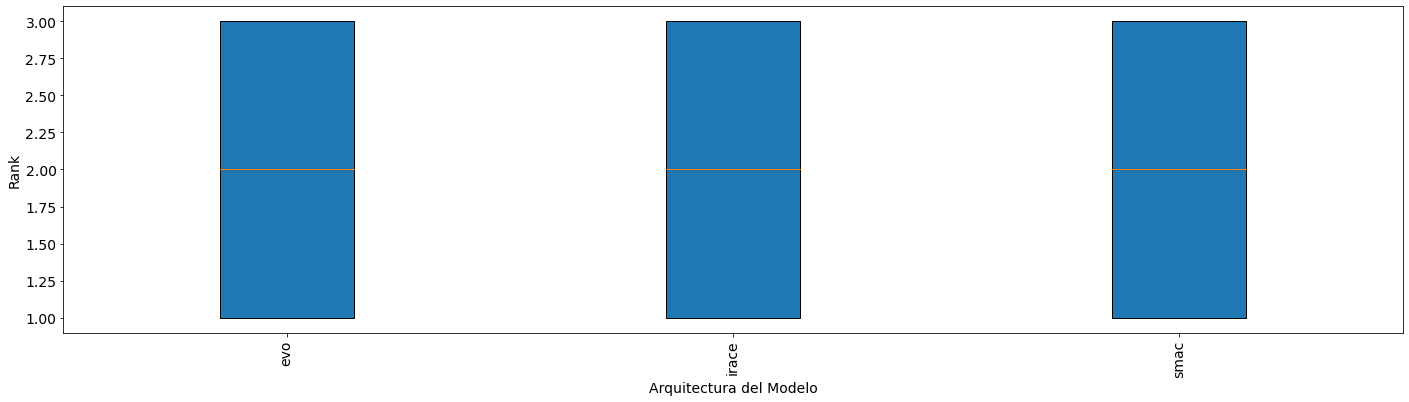

In [28]:
df = df.rank(axis=1, numeric_only=True)

x = df.columns
y = [df[a] for a in df]
plt.rcParams["figure.figsize"] = (24,6)
plt.xticks(rotation=90)
plt.xlabel("Arquitectura del Modelo")
plt.ylabel("Rank")


a = plt.boxplot(y, labels=x, patch_artist=True, showfliers=False)

In [37]:
df_rank = df.rank(axis=1, numeric_only=True)
print(sorted(df_rank.sum().items(), key=lambda x:x[1]))

df_rank

[('irace', 548640.5), ('evo', 552948.5), ('smac', 583961.0)]


,evo,irace,smac
0,1.0,2.0,3.0
1,1.0,3.0,2.0
2,2.0,3.0,1.0
3,1.0,2.0,3.0
4,2.0,1.0,3.0
...,...,...,...
280920,2.0,1.0,3.0
280921,3.0,1.0,2.0
280922,1.0,3.0,2.0
280923,3.0,2.0,1.0


In [40]:
for a,b in sorted([(a,b/280925) for a,b in df.rank(axis=1, numeric_only=True).sum().items()], key=lambda x: x[1]):
	print(a,round(b,2))

irace 1.95
evo 1.97
smac 2.08


In [45]:
df = df * -1
# compare samples
args = tuple(df[conf] for conf in df)

stat, p = friedmanchisquare(*args)

# interpret
alpha = 0.05
if p < alpha:
    # Different distributions (reject H0)
    posthoc_matrix = sp.posthoc_conover(
        pd.melt(df, var_name="configuration", value_name="rank"),
        val_col="rank",
        group_col="configuration",
        p_adjust="holm",
    )
    different_dists = posthoc_matrix.index[
        posthoc_matrix[df.sum().idxmax()] < 0.05
    ].tolist()
    df.drop(different_dists, axis=1, inplace=True)

df

,evo
0,-87.0
1,-273.0
2,-377.0
3,-77.0
4,-70.0
...,...
280920,-1000.0
280921,-1000.0
280922,-5.0
280923,-902.0


In [23]:
asdf = [('irace_5', 405111.5),
 ('evo_3', 416400.0),
 ('evo_2', 429469.5),
 ('irace_2', 433615.5),
 ('irace_4', 433615.5),
 ('evo_1', 436072.5),
 ('irace_3', 447331.0),
 ('smac_2', 451682.0),
 ('evo_5', 454579.5),
 ('evo_4', 463024.5),
 ('irace_1', 463932.5),
 ('smac_4', 464169.0),
 ('smac_1', 468215.0),
 ('smac_5', 475033.5),
 ('smac_3', 499948.5)]

In [26]:
evotoon = [b for a,b in asdf if "evo" in a] 
irace = [b for a,b in asdf if "irace" in a] 
smac = [b for a,b in asdf if "smac" in a] 

In [27]:
sum(evotoon)

2199546.0

In [28]:
sum(irace)

2183606.0

In [29]:
sum(smac)

2359048.0